# Trabajo Final | Entrega Final

1) Presentación de la empresa, organización o problema específico.
2) Preguntas y objetivos de la investigación.
3) Conformación del equipo de trabajo.
4) Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).
5) Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.
6) Análisis de componentes principales.
7) Contar la historia de sus datos
8) Filtros aplicados a los datos. Distribución. Dataset final para analizar.
9) Palttear objetivos u objetivo para esos datos.

1) Es un banco digital de Portugal.

2) Este proyecto permitirá al Banco desarrollar una comprensión más aguda de su base de clientes, predecir las respuestas de los mismos a su campaña de Marketing y establecer un perfil objetivo para futuros planes de acción. Al analizar las características de los clientes, como la demografía y el historial de transacciones, el Banco podrá predecir los comportamientos de ahorro de los clientes e identificar qué tipo es más probable que realice depósitos a plazo. El Banco puede entonces centrar sus esfuerzos de Marketing en tales. Esto no solo permitirá que se banco asegure los depósitos de manera más efectiva, sino que también aumentará la satisfacción del cliente al reducir los anuncios no deseados para algunos de ellos.

3) Marcos Melgar, Matías Berisso y Maximiliano Adon.


4) La fuente fue extraída de Kaggle la cual es una página que posee varios Dataset para analizar. Fue elegido este dataset porque es un área que es relevante para poder analizar y extraer información valiosa.

5) El análisis Univariado, Bivariado y Multivariado están debajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
base = pd.read_csv(r"C:\Users\mmelgar\Desktop\Coderhouse\bank_cleaned.csv",sep=',',encoding='latin-1') # Importo el dataset seleccionado en cuestión.

Variables Numéricas

1) Age(Numeric)
2) Balance: average yearly balance, in euros (numeric)
3) Day: last contact day of the month (numeric 1 -31) 
4) Duration: last contact duration, in seconds (numeric)
5) Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
6) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
7) previous: number of contacts performed before this campaign and for this client (numeric)

Variables Categóricas

1) Job : type of job 
2) Marital : marital status 
3) Education : education
4) Default: has credit in default? (categorical: 'no','yes','unknown')
5) Housing: has housing loan? (categorical: 'no','yes','unknown')
6) Loan: has personal loan? (categorical: 'no','yes','unknown')
7) poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

Variable a Pronosticar

Target:has the client subscribed a term deposit? (binary: 'yes', 'no') (binary response: 0: No, 1: Yes)

In [4]:
base.head() # Verifico que se importó correctamente.

Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           5   35    management  married   tertiary      no      231     yes   
4           6   28    management   single   tertiary      no      447     yes   

  loan  day month  duration  campaign  pdays  previous poutcome response  \
0   no    5   may      4.35         1     -1         0  unknown       no   
1   no    5   may      2.52         1     -1         0  unknown       no   
2  yes    5   may      1.27         1     -1         0  unknown       no   
3   no    5   may      2.32         1     -1         0  unknown       no   
4  yes    5   may      3.62         1     -1         0  unknown       no   

   response_binary  
0                0  
1                0  
2                0  
3                0  
4                0

Al notar que hay una columna "Unnamed" que no tiene importancia en la base procederemos a borrarla

In [2]:
base = base.loc[:,~base.columns.str.contains('^Unnamed')] # Elimino la columna "Unnamed".
base.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   35    management  married   tertiary      no      231     yes   no    5   
4   28    management   single   tertiary      no      447     yes  yes    5   

  month  duration  campaign  pdays  previous poutcome response  \
0   may      4.35         1     -1         0  unknown       no   
1   may      2.52         1     -1         0  unknown       no   
2   may      1.27         1     -1         0  unknown       no   
3   may      2.32         1     -1         0  unknown       no   
4   may      3.62         1     -1         0  unknown       no   

   response_binary  
0                0  
1                0  
2                0  
3                0  
4                0

In [12]:
base.shape # Observo el tamaño de la base.

(40841, 17)

Podemos ver que la base posee 40841 Registros y 17 Columnas o Features

In [5]:
base.dtypes # Tipos de datos de las features.

age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object

In [10]:
base.describe().T # Observo los principales estadísticos.

count         mean          std     min    25%    50%  \
age              40841.0    40.790676    10.475473    18.0  33.00   39.0   
balance          40841.0  1073.981807  1712.556186 -6847.0  64.00  421.0   
day              40841.0    15.863666     8.313608     1.0   8.00   16.0   
duration         40841.0     4.308949     4.305823     0.1   1.73    3.0   
campaign         40841.0     2.774149     3.104177     1.0   1.00    2.0   
pdays            40841.0    32.248304    90.738402    -1.0  -1.00   -1.0   
previous         40841.0     0.436791     1.572342     0.0   0.00    0.0   
response_binary  40841.0     0.113587     0.317313     0.0   0.00    0.0   

                    75%       max  
age                48.0     95.00  
balance          1333.0  10443.00  
day                21.0     31.00  
duration            5.3     81.97  
campaign            3.0     58.00  
pdays              -1.0    871.00  
previous            0.0     55.00  
response_binary     0.0      1.00

In [11]:
nulls = base.isna().sum() # A fin de determinar cuales son los Nulls. 
print(nulls)

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64


In [4]:
base['response_binary'].value_counts(normalize=True)*100 # Observamos la proporción de los datos que sí hicieron depósito y los que no.

0    88.641316
1    11.358684
Name: response_binary, dtype: float64

El 88% de la base de datos no realizó depósito y el 12% sí.

# Análisis Univariado

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

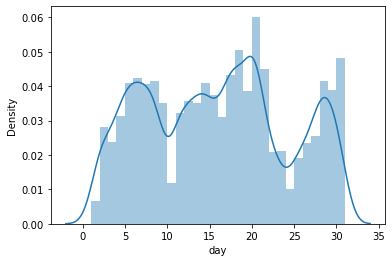

In [13]:
sns.distplot(base.day.dropna(), bins = 30) #Analizamos la distribución de los días de la campaña

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

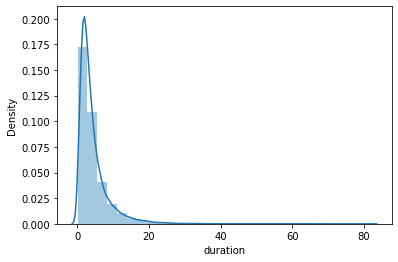

In [14]:
sns.distplot(base.duration.dropna(), bins = 30) # Observamos la distribución de datos de la variable duración de llamada.

In [15]:
duration_30 = base[base["duration"] < 30] # A fin foco en las llamadas menores a 30.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

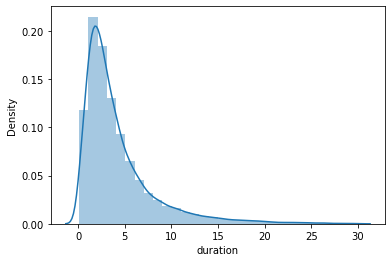

In [16]:
sns.distplot(duration_30.duration.dropna(), bins = 30)

Podemos ver que la mayoría de las llamadas son entre 0 y 10

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

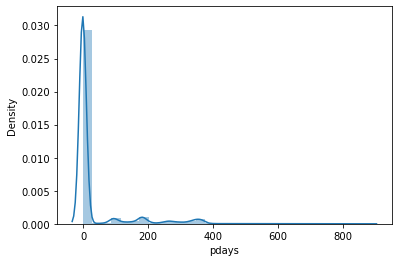

In [17]:
sns.distplot(base.pdays.dropna(), bins = 30) # Observamos la distribución de datos de la variable PDAYS.

In [18]:
pdays_100 = base[base["pdays"] < 100] # A fin de hacer foco en las llamadas menores a 30.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

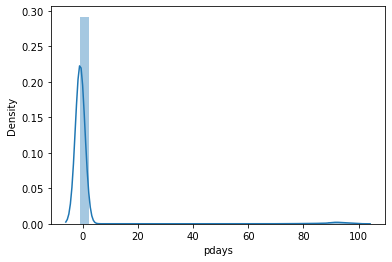

In [19]:
sns.distplot(pdays_100.pdays.dropna(), bins = 30) # Observamos la distribución de datos de la variable PDAYS. 

C:\Users\mmelgar\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

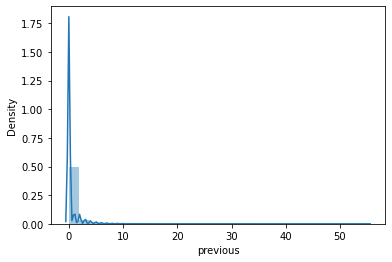

In [16]:
sns.distplot(base.previous.dropna(), bins = 30)

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

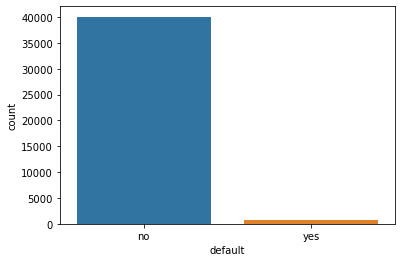

In [20]:
sns.countplot(base.default.dropna(), order = base.default.value_counts().index)

Concluimos que la mayor parte de los clientes no tiene un crédito en Default.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

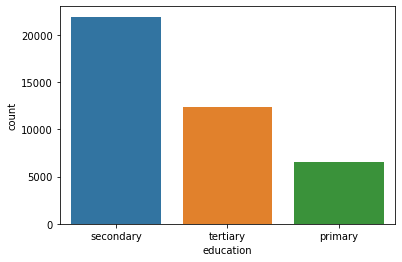

In [21]:
sns.countplot(base.education.dropna(), order = base.education.value_counts().index)

La mayor cantidad de datos se concentra en la gente de secundaria.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

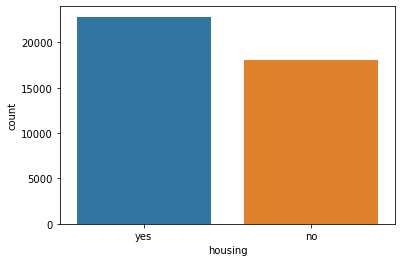

In [22]:
sns.countplot(base.housing.dropna(), order = base.housing.value_counts().index)

Concluimos que la mayoría de los clientes tiene un crédito hipotecario.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

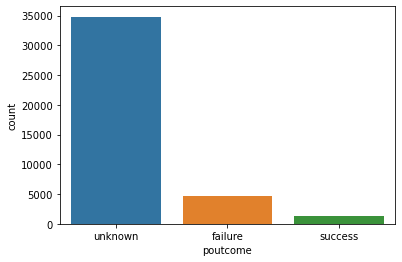

In [23]:
sns.countplot(base.poutcome.dropna(), order = base.poutcome.value_counts().index)

Concluimos que la mayoría de los datos no tienen información de campañas anteriores.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

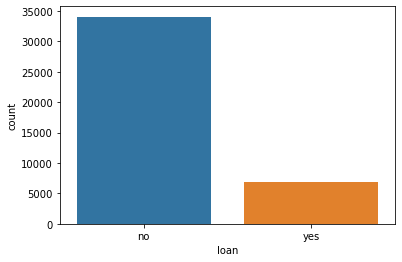

In [24]:
sns.countplot(base.loan.dropna(), order = base.loan.value_counts().index)

Concluimos que la mayoría de los clientes no tiene un crédito.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

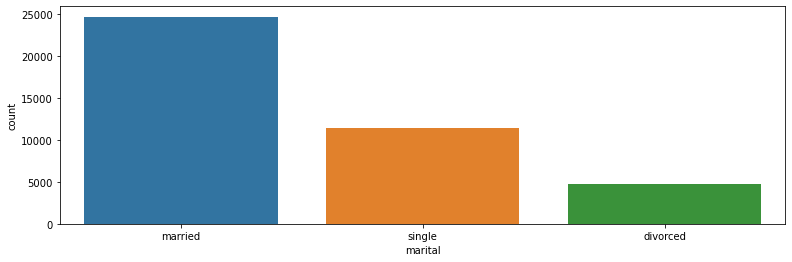

In [25]:
plt.figure(figsize=(13, 4))
sns.countplot(base.marital.dropna(), order = base.marital.value_counts().index)

Se puede apreciar que la mayor cantidad de registros o de clientes están casados.

In [26]:
balance_20 = base[base["balance"] < 20000]

In [27]:
balance_20.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   35    management  married   tertiary      no      231     yes   no    5   
4   28    management   single   tertiary      no      447     yes  yes    5   

  month  duration  campaign  pdays  previous poutcome response  \
0   may      4.35         1     -1         0  unknown       no   
1   may      2.52         1     -1         0  unknown       no   
2   may      1.27         1     -1         0  unknown       no   
3   may      2.32         1     -1         0  unknown       no   
4   may      3.62         1     -1         0  unknown       no   

   response_binary  
0                0  
1                0  
2                0  
3                0  
4                0

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

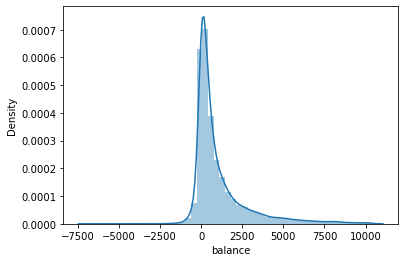

In [28]:
sns.distplot(base.balance.dropna()) 

Realizando un análisis más detallado, concluimos que el balance se concentra en valores < 20.000.

In [29]:
maritalfrec = base["marital"].value_counts() # Cuento las cantidades de balances.
print(maritalfrec)

married     24641
single      11443
divorced     4757
Name: marital, dtype: int64


In [30]:
maritalfrec_df = pd.DataFrame(maritalfrec) # Transformo a dataframe.
maritalfrec_df

marital
married     24641
single      11443
divorced     4757

In [31]:
maritalfrec_df.rename(columns={'marital':'frec_abs'},inplace=True)
maritalfrec_df

frec_abs
married      24641
single       11443
divorced      4757

In [32]:
Frec_abs_val = maritalfrec_df["frec_abs"].values

acum = []

valor_acum = 0

for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
maritalfrec_df["frec_abs_acum"] = acum # Calculamos la frecuencia acumulada.
maritalfrec_df # Figura en 0 porque no se pueden sumar valores no numéricos.

frec_abs  frec_abs_acum
married      24641          24641
single       11443          36084
divorced      4757          40841

Obtenemos los valores de las Frecuencias Absolutas.

In [33]:
maritalfrec_df["frec_rel_%"] = round(100 * maritalfrec_df["frec_abs"]/len(base.marital),4)
maritalfrec_df

frec_abs  frec_abs_acum  frec_rel_%
married      24641          24641     60.3340
single       11443          36084     28.0184
divorced      4757          40841     11.6476

Calculamos la frecuencia relativa en términos procentuales. 

<AxesSubplot:xlabel='age', ylabel='Count'>

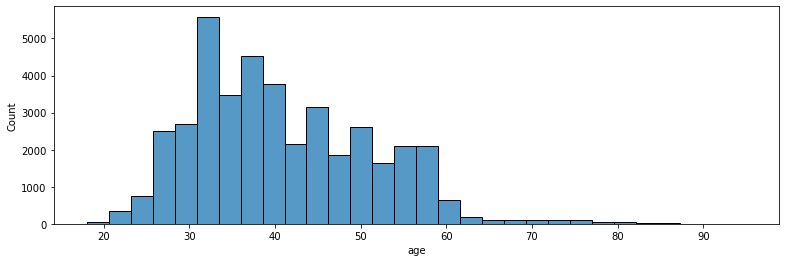

In [34]:
plt.figure(figsize=(13, 4))
sns.histplot(base.age.dropna(), bins = 30)

Podemos apreciar que el rango etario es mayor entre la gente de 30 y 40 años.

# Análisis Bivariado

In [36]:
# Data Profiling
profile = pandas_profiling.ProfileReport(base)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Matriz de Correlación

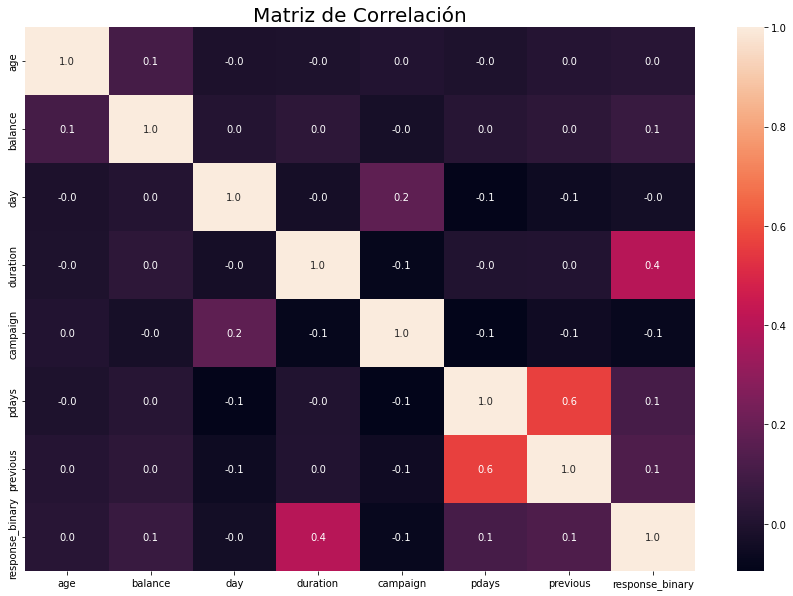

In [4]:
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(base.corr(), fmt = ".1f", annot = True)
plt.title('Matriz de Correlación', fontsize = 20)
plt.show()

Se deduce que hay una cierta correlatividad entre la duración de la llamada y la respuesta, si realizó el depósito.

C:\Users\mmelgar\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


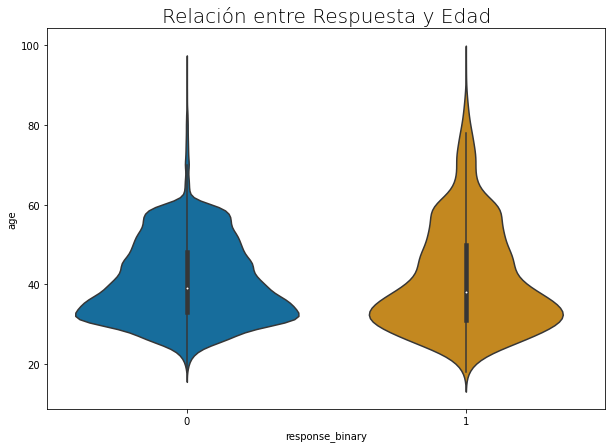

In [5]:
# Response Vs. Age
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(base['response_binary'], base['age'], palette = 'colorblind')
plt.title('Relación entre Respuesta y Edad', fontsize = 20, fontweight = 30)
plt.show()

Se conculuye que no existe mucha relación entre la gente que realizó el depósito y los que no en relación a la edad.

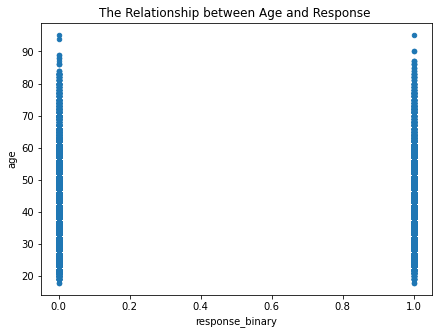

In [38]:
scatter_age_response = base.plot.scatter('response_binary','age',figsize = (7,5))

plt.title('The Relationship between Age and Response ')
plt.show()

No encontramos una relación directa entre los que realizaron depósito y edad.

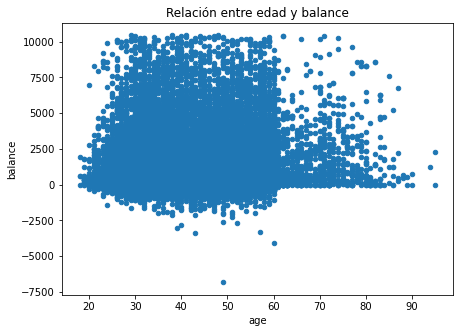

In [36]:
scatter_age_balance = base.plot.scatter('age','balance',figsize = (7,5))

plt.title('Relación entre edad y balance')
plt.show()

Se observa que el balance se reduce a partir de la gente de edad de mayor de 60 años.

job            response_binary
admin.         0                  4142
               1                   563
blue-collar    0                  8168
               1                   637
entrepreneur   0                  1231
               1                   109
housemaid      0                  1048
               1                   101
management     0                  7440
               1                  1125
other          0                   143
               1                    15
retired        0                  1572
               1                   448
self-employed  0                  1281
               1                   162
services       0                  3469
               1                   332
student        0                   486
               1                   203
technician     0                  6200
               1                   754
unemployed     0                  1022
               1                   190
Name: response_binary, dtype: int

<AxesSubplot:xlabel='Count', ylabel='job'>

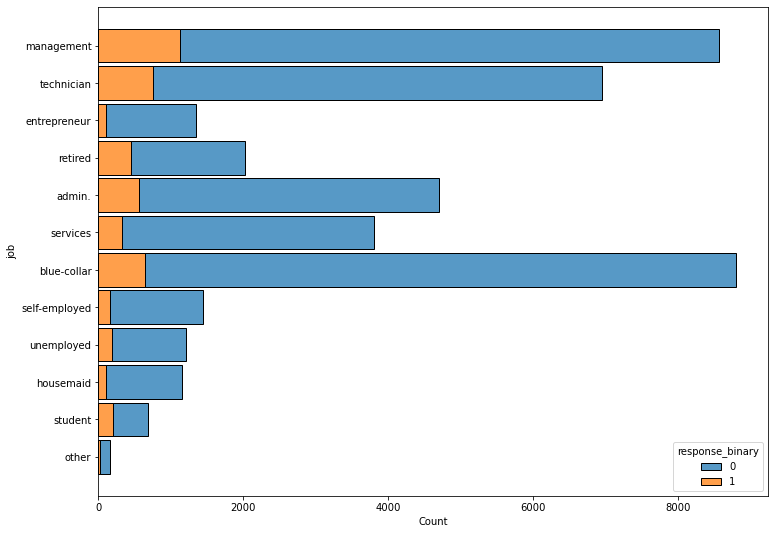

In [39]:
# Relacion entre Job y Response.
job_responsebinary = base.groupby('job')['response_binary'].value_counts()
print(job_responsebinary)
sns.histplot(base, y='job', hue='response_binary',  multiple='stack', shrink=0.9)

Dos tipos de ver por Job cuantos son los que realizaron el depósito y cuáles no:

Tipo 1

In [40]:
#sns.countplot(base, x = "job", hue = "response_binary")
job_binary = base['job'].groupby(base['response_binary']).value_counts().reset_index(name="total")
print(job_binary)
job_binary['percent'] = (job_binary['total'] / 
                  job_binary['total'].sum()) * 100 #Calculo el porcentaje del total.
print(job_binary)

    response_binary            job  total
0                 0    blue-collar   8168
1                 0     management   7440
2                 0     technician   6200
3                 0         admin.   4142
4                 0       services   3469
5                 0        retired   1572
6                 0  self-employed   1281
7                 0   entrepreneur   1231
8                 0      housemaid   1048
9                 0     unemployed   1022
10                0        student    486
11                0          other    143
12                1     management   1125
13                1     technician    754
14                1    blue-collar    637
15                1         admin.    563
16                1        retired    448
17                1       services    332
18                1        student    203
19                1     unemployed    190
20                1  self-employed    162
21                1   entrepreneur    109
22                1      housemaid

Tipo 2 (Más adecuado)

response_binary         0         1
job                                
admin.           0.880340  0.119660
blue-collar      0.927655  0.072345
entrepreneur     0.918657  0.081343
housemaid        0.912097  0.087903
management       0.868651  0.131349
other            0.905063  0.094937
retired          0.778218  0.221782
self-employed    0.887734  0.112266
services         0.912655  0.087345
student          0.705370  0.294630
technician       0.891573  0.108427
unemployed       0.843234  0.156766


<AxesSubplot:xlabel='job'>

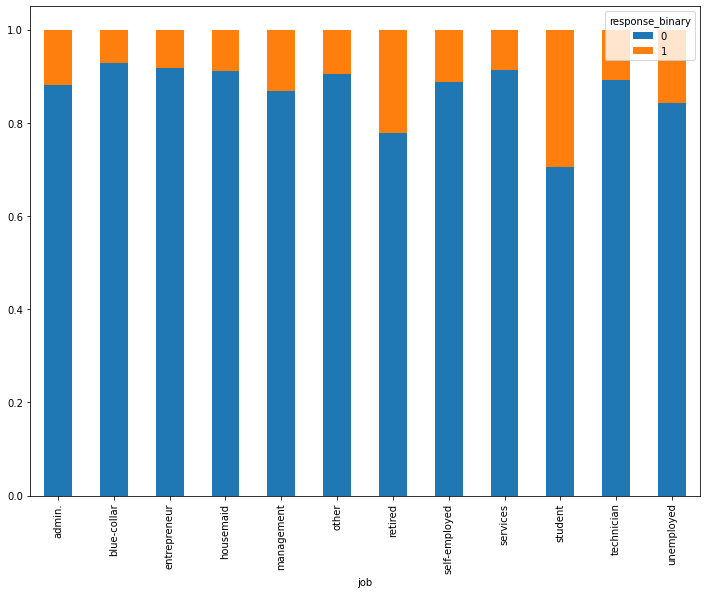

In [39]:
base_response_binary = pd.crosstab(base.job, base.response_binary, normalize = "index")
print(base_response_binary)
base_response_binary.plot.bar(stacked=True)

Se observa que los mayores porcentajes se dan en Retired y Student.

In [8]:
Lista = [base]
for column in Lista:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    #recorremos la base para definir la columna age group

In [9]:
count_age_response_pct = pd.crosstab(base['response_binary'],base['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 
count_age_response_pct

response_binary          0          1
age_group                            
20.0             83.013699  16.986301
30.0             89.635398  10.364602
40.0             91.175912   8.824088
50.0             90.817141   9.182859
60.0             66.599462  33.400538

Realizamos el cruce con los que realizaron el depósito.

response_binary         0         1
age_group                          
20.0             0.830137  0.169863
30.0             0.896354  0.103646
40.0             0.911759  0.088241
50.0             0.908171  0.091829
60.0             0.665995  0.334005


<AxesSubplot:xlabel='age_group'>

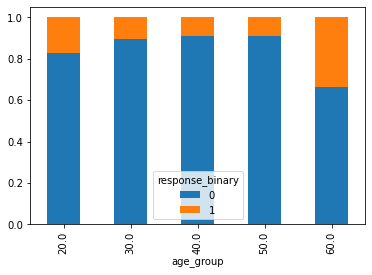

In [10]:
countage_response_binary = pd.crosstab(base['age_group'],base['response_binary'], normalize = "index") # Cruce entre el rango etario y si realizó el depósito o no.
print(countage_response_binary)
countage_response_binary.plot.bar(stacked=True)


Obersvamos que hay mayor porcentaje en la gente de rango etario mayor  60 y del rango etario de mayor a 20 y menor a 30.

In [11]:
age = pd.DataFrame(base['age_group'].value_counts())
age['% Contactados'] = age['age_group']*100/age['age_group'].sum() #Realizamos el conteo de los contactados por grupo etario.
age['% Suscriptos'] = count_age_response_pct[1] #Realizamos el conteo de los suscriptos por rango etario.
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
age


% Contactados  % Suscriptos  age
20.0      11.618227     16.986301   20
30.0      40.562180     10.364602   30
40.0      25.778017      8.824088   40
50.0      18.398178      9.182859   50
60.0       3.643398     33.400538   60

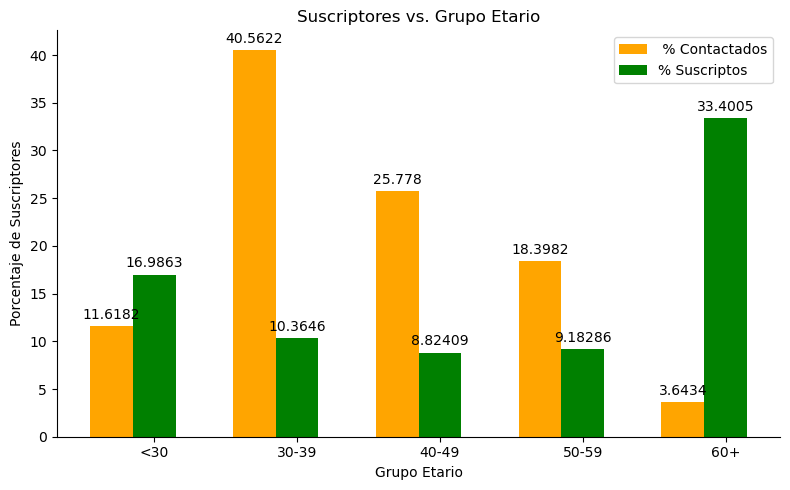

In [39]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)  # 800x500 px

bar_width = 0.30
x = np.arange(age.index.size)

Contactados = ax.bar(x - bar_width, age['% Contactados'],
                       bar_width, label=' % Contactados', color='orange')
Suscriptos = ax.bar(x, age['% Suscriptos'],
                       bar_width, label='% Suscriptos', color='green')

ax.set_xticks(x)
ax.set_xticklabels(age.index, rotation=90)
ax.legend()

plt.xlabel('Grupo Etario')
plt.ylabel('Porcentaje de Suscriptores')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Suscriptores vs. Grupo Etario')

# Etiquetas en barras
ax.bar_label(Contactados, padding=3)
ax.bar_label(Suscriptos, padding=3)

ax.spines['right'].set_visible(False)  # ocultar borde derecho
ax.spines['top'].set_visible(False)    # ocultar borde superior

fig.tight_layout()  # ajustar elementos al tamaño de la figura

Observamos que el Banco realizó esfuerzos en los grupos etarios equivocados. El banco debería centrarse en el rango etario de mayores de 60 y menores de 30 ya que con menos esfuerzo, tuvieron mayor tasa de aceptaciones.

# Análisis Multivariado

<Figure size 1440x1080 with 0 Axes>

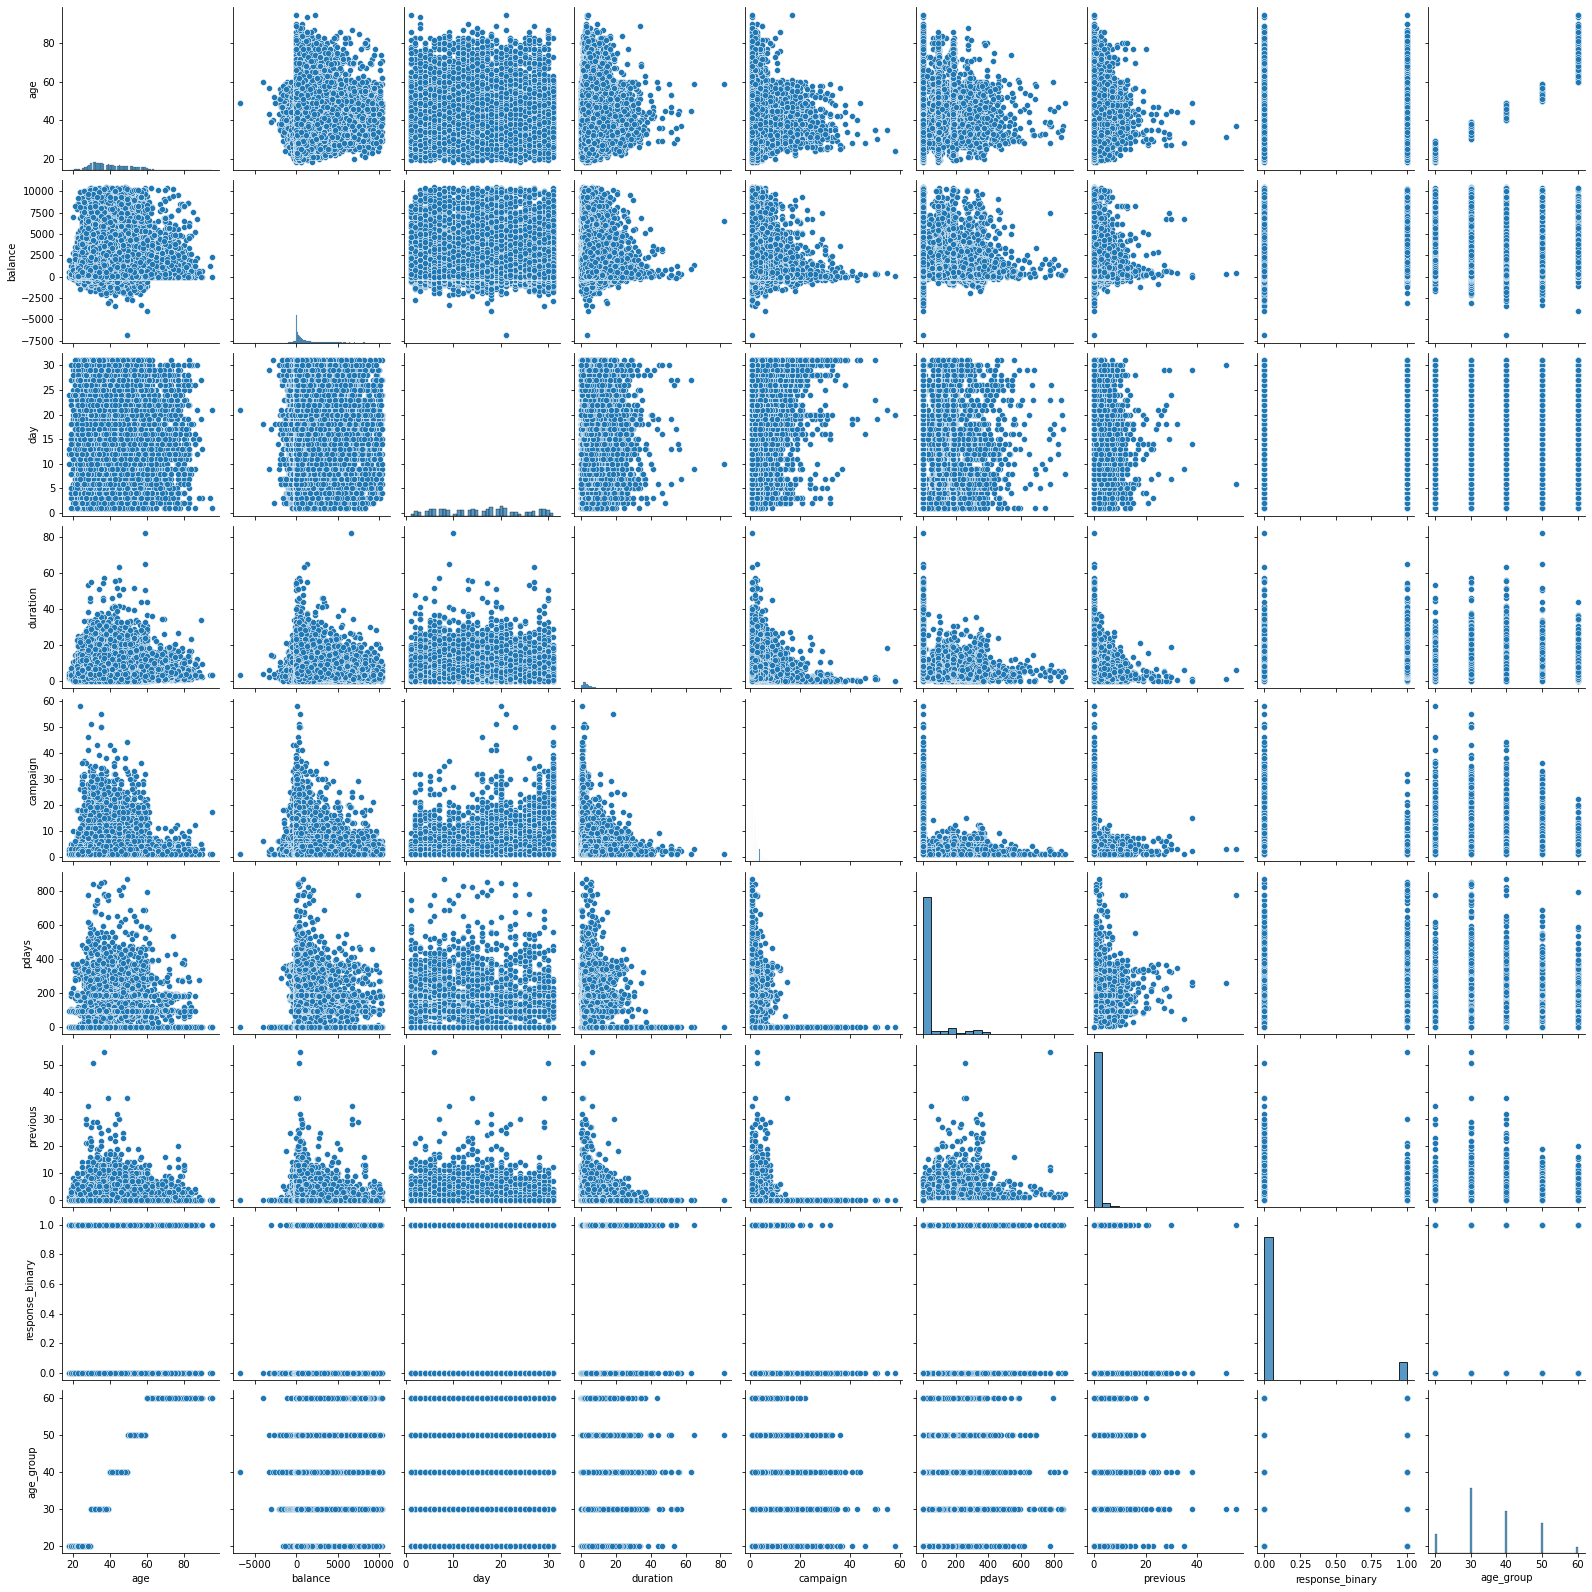

In [47]:
plt.figure(dpi=120)
sns.pairplot(base) # Realizamos un pairplot para determinar las relaciones entre todas las variables numéricas de la base.
plt.show()

Realizamos el mismo gráfico pero con la variable response_binary para observar si existe algún patrón.

<Figure size 1440x1080 with 0 Axes>

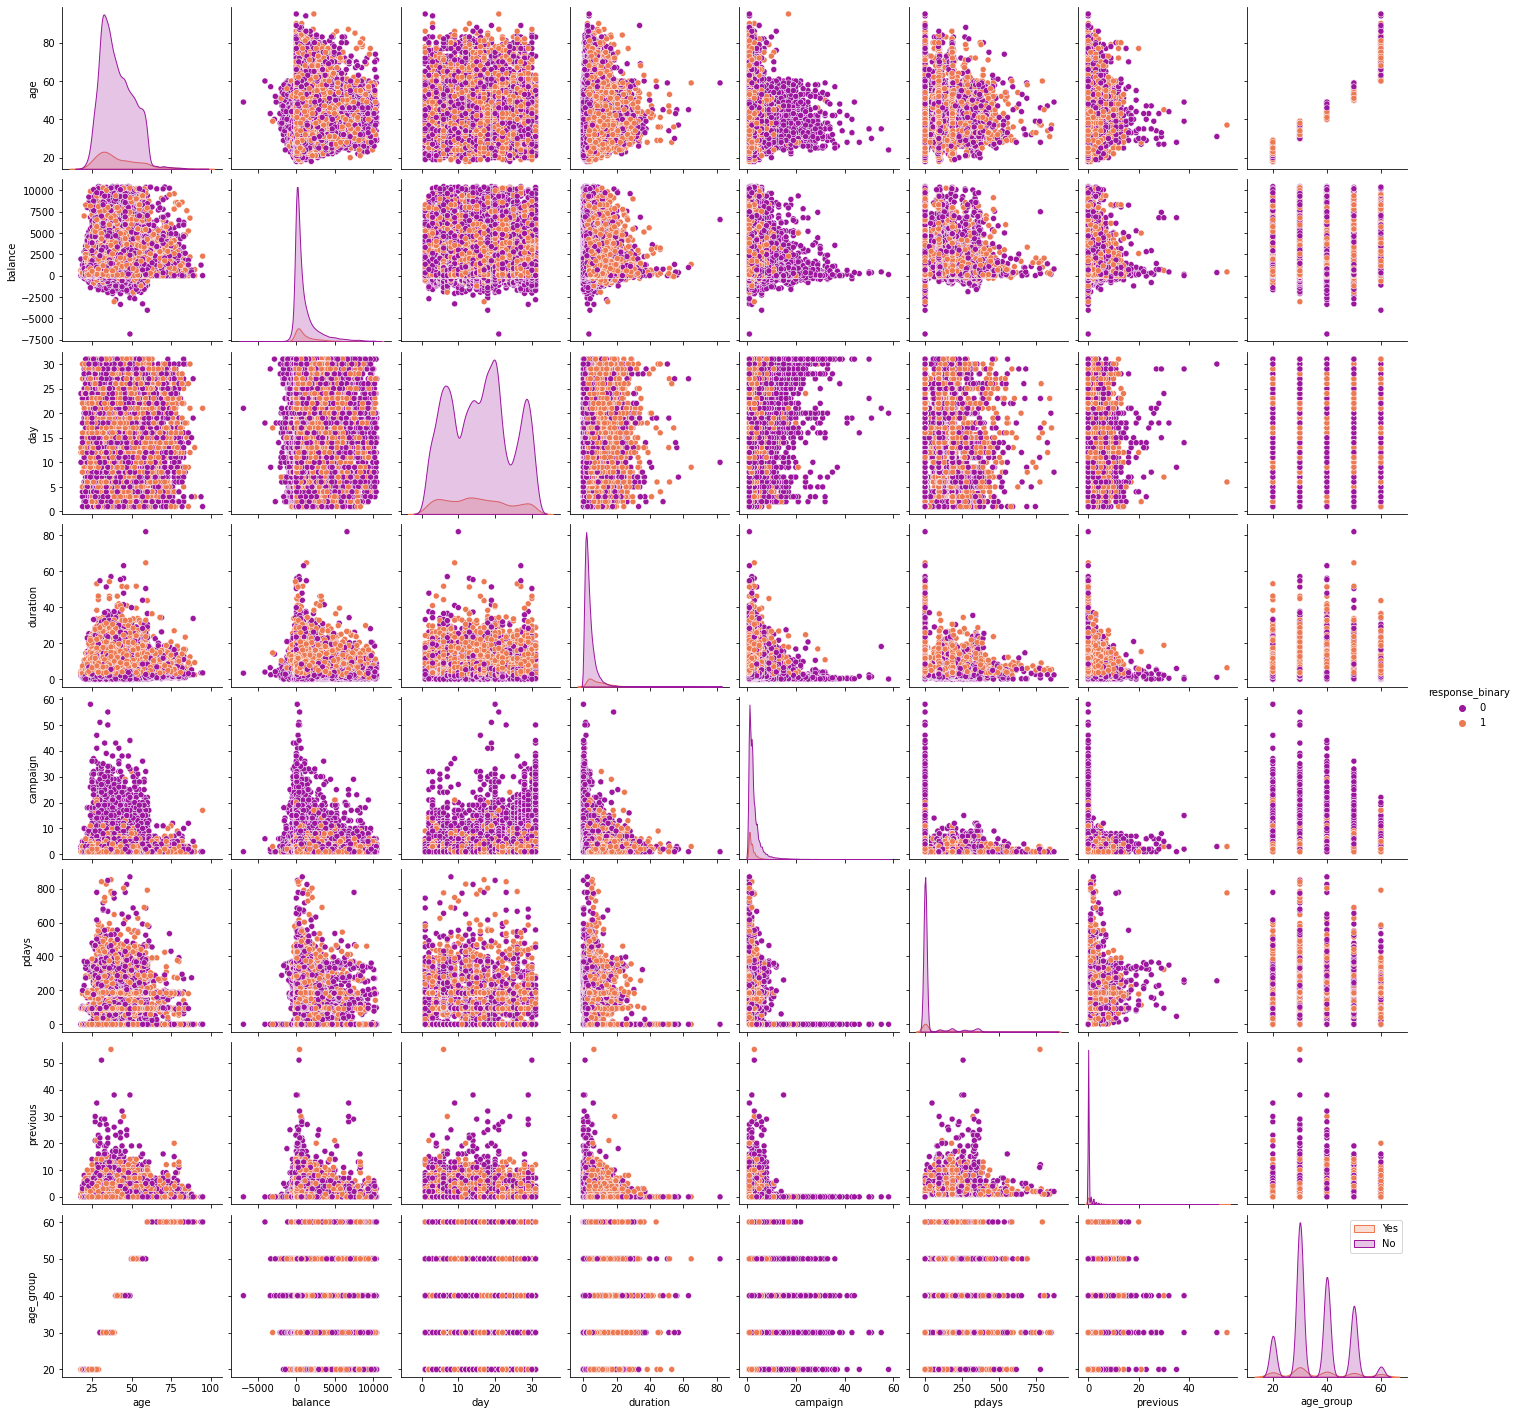

In [48]:
plt.figure(dpi = 120)
sns.pairplot(base,hue = 'response_binary',palette = 'plasma')
plt.legend(['Yes','No'])
plt.show()

Se puede apreciar que se concentra la cantidad de "1", en la variable campaña que es la cantidad de llamados menor a 5 y en la duración de la llamada menor a 20.

/opt/miniconda3/envs/ds/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


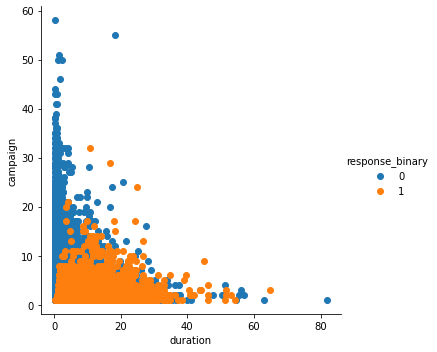

In [49]:
#FacetGrid - Duration Vs. Campaign
sns.FacetGrid(base,hue = 'response_binary' , size = 5).map(plt.scatter,'duration','campaign').add_legend();
plt.show()

Se observa mediante el gráfico lo que se ve en el anterior de pair plot.

response_binary         0         1
education                          
primary          0.916207  0.083793
secondary        0.896093  0.103907
tertiary         0.853554  0.146446


<AxesSubplot:xlabel='education'>

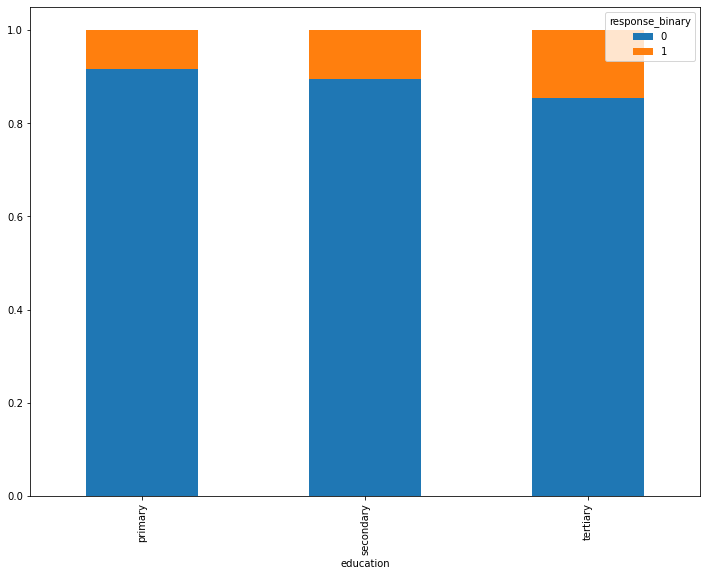

In [50]:
base_response_binary_education = pd.crosstab(base.education, base.response_binary, normalize = "index")
print(base_response_binary_education)
base_response_binary_education.plot.bar(stacked=True)

Observamos mediante el gráfico que hay más tendencia a que realice el depósito cuando va incrementando de nivel de educación, de 8% nivel primario, a 10% secundario y por último 14% nivel terciario.

response_binary         0         1
loan                               
no               0.877064  0.122936
yes              0.933225  0.066775


<AxesSubplot:xlabel='loan'>

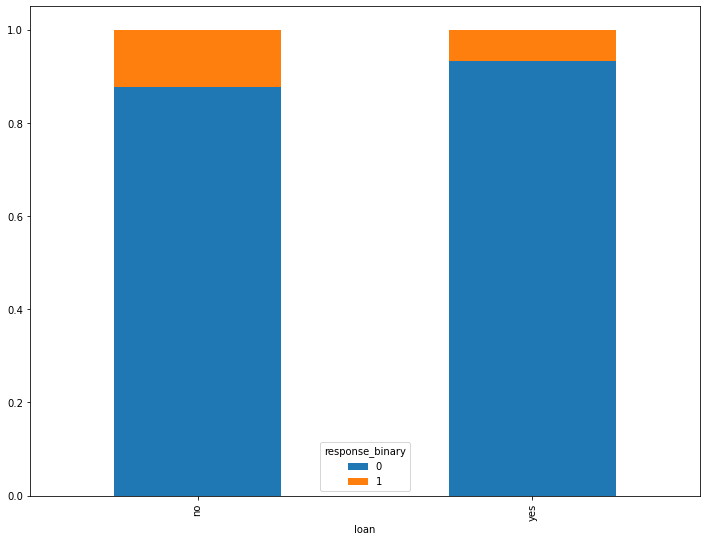

In [51]:
base_response_binary_loan = pd.crosstab(base.loan, base.response_binary, normalize = "index")
print(base_response_binary_loan)
base_response_binary_loan.plot.bar(stacked=True)

Observamos que las personas que no tienen préstamos, el 12% realizó el depósito, y de las que sí tienen préstamos, el 6% realizó depósito.

response_binary         0         1
housing                            
no               0.838966  0.161034
yes              0.923883  0.076117


<AxesSubplot:xlabel='housing'>

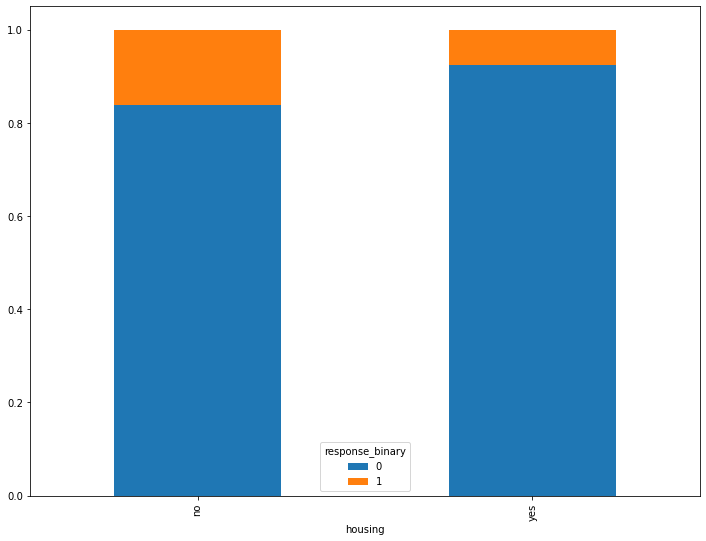

In [52]:
base_response_binary_housing = pd.crosstab(base.housing, base.response_binary, normalize = "index")
print(base_response_binary_housing)
base_response_binary_housing.plot.bar(stacked=True)

Observamos que las personas que no tienen préstamos de propiedad, el 16% realizó el depósito, y de las que sí tienen préstamos de propiedad, el 7% realizó depósito.

# Árbol de Decisión de Clasificación

In [3]:
from sklearn.tree import DecisionTreeClassifier # Importo la librería.
from sklearn.model_selection import train_test_split # Importo para entrenar el modelo.

In [4]:
# Preparamos los datos.
base_dummy = pd.get_dummies(base, columns = ['job'])
base_dummy = pd.get_dummies(base_dummy, columns = ['education'])
base_dummy = pd.get_dummies(base_dummy, columns = ['marital'])
base_dummy = pd.get_dummies(base_dummy, columns = ['poutcome'])
base_dummy['housing'] = base_dummy['housing'].map({'yes': 1, 'no': 0})
base_dummy['default'] = base_dummy['default'].map({'yes': 1, 'no': 0})
base_dummy['loan'] = base_dummy['loan'].map({'yes': 1, 'no': 0})
baseset_response = pd.DataFrame(base['response_binary'])
base_dummy2 = pd.merge(base_dummy, baseset_response, left_index = True, right_index = True)
base_dummy2

age  default  balance  housing  loan  day month  duration  campaign  \
0       58        0     2143        1     0    5   may      4.35         1   
1       44        0       29        1     0    5   may      2.52         1   
2       33        0        2        1     1    5   may      1.27         1   
3       35        0      231        1     0    5   may      2.32         1   
4       28        0      447        1     1    5   may      3.62         1   
...    ...      ...      ...      ...   ...  ...   ...       ...       ...   
40836   25        0      505        0     1   17   nov      6.43         2   
40837   51        0      825        0     0   17   nov     16.28         3   
40838   71        0     1729        0     0   17   nov      7.60         2   
40839   72        0     5715        0     0   17   nov     18.78         5   
40840   57        0      668        0     0   17   nov      8.47         4   

       pdays  ...  education_primary education_secondary  education_tertiary  \
0         -1  ...                  0                   0                   1   
1         -1  ...                  0                   1                   0   
2         -1  ...                  0                   1                   0   
3         -1  ...                  0                   0                   1   
4         -1  ...                  0                   0                   1   
...      ...  ...                ...                 ...                 ...   
40836     -1  ...                  0                   1                   0   
40837     -1  ...                  0                   0                   1   
40838     -1  ...                  1                   0                   0   
40839    184  ...                  0                   1                   0   
40840     -1  ...                  0                   1                   0   

       marital_divorced  marital_married  marital_single  poutcome_failure  \
0                     0                1               0                 0   
1                     0                0               1                 0   
2                     0                1               0                 0   
3                     0                1               0                 0   
4                     0                0               1                 0   
...                 ...              ...             ...               ...   
40836                 0                0               1                 0   
40837                 0                1               0                 0   
40838                 1                0               0                 0   
40839                 0                1               0                 0   
40840                 0                1               0                 0   

       poutcome_success  poutcome_unknown  response_binary_y  
0                     0                 1                  0  
1                     0                 1                  0  
2                     0                 1                  0  
3                     0                 1                  0  
4                     0                 1                  0  
...                 ...               ...                ...  
40836                 0                 1                  1  
40837                 0                 1                  1  
40838                 0                 1                  1  
40839                 1                 0                  1  
40840                 0                 1                  0  

[40841 rows x 35 columns]

In [5]:
base_dummy2 = base_dummy2.drop('month', axis=1) # Eliminamos esta variable ya que distorsionaría el resultado.
base_dummy2 = base_dummy2.drop('default', axis=1) # Eliminamos esta variable ya que no influye en el resultado.
base_dummy2 = base_dummy2.drop('duration', axis=1) # Eliminamos esta variable ya que no vamos a tener la duración de las llamadas en la próxima campaña.
base_dummy2

age  balance  housing  loan  day  campaign  pdays  previous response  \
0       58     2143        1     0    5         1     -1         0       no   
1       44       29        1     0    5         1     -1         0       no   
2       33        2        1     1    5         1     -1         0       no   
3       35      231        1     0    5         1     -1         0       no   
4       28      447        1     1    5         1     -1         0       no   
...    ...      ...      ...   ...  ...       ...    ...       ...      ...   
40836   25      505        0     1   17         2     -1         0      yes   
40837   51      825        0     0   17         3     -1         0      yes   
40838   71     1729        0     0   17         2     -1         0      yes   
40839   72     5715        0     0   17         5    184         3      yes   
40840   57      668        0     0   17         4     -1         0       no   

       response_binary_x  ...  education_primary  education_secondary  \
0                      0  ...                  0                    0   
1                      0  ...                  0                    1   
2                      0  ...                  0                    1   
3                      0  ...                  0                    0   
4                      0  ...                  0                    0   
...                  ...  ...                ...                  ...   
40836                  1  ...                  0                    1   
40837                  1  ...                  0                    0   
40838                  1  ...                  1                    0   
40839                  1  ...                  0                    1   
40840                  0  ...                  0                    1   

       education_tertiary  marital_divorced  marital_married  marital_single  \
0                       1                 0                1               0   
1                       0                 0                0               1   
2                       0                 0                1               0   
3                       1                 0                1               0   
4                       1                 0                0               1   
...                   ...               ...              ...             ...   
40836                   0                 0                0               1   
40837                   1                 0                1               0   
40838                   0                 1                0               0   
40839                   0                 0                1               0   
40840                   0                 0                1               0   

       poutcome_failure  poutcome_success  poutcome_unknown  response_binary_y  
0                     0                 0                 1                  0  
1                     0                 0                 1                  0  
2                     0                 0                 1                  0  
3                     0                 0                 1                  0  
4                     0                 0                 1                  0  
...                 ...               ...               ...                ...  
40836                 0                 0                 1                  1  
40837                 0                 0                 1                  1  
40838                 0                 0                 1                  1  
40839                 0                 1                 0                  1  
40840                 0                 0                 1                  0  

[40841 rows x 32 columns]

In [6]:
# Seperamos en X e Y.
X = base_dummy2.drop(['response_binary_y','response','response_binary_x'], axis=1) # Elimino de mi dataset la variable a predecir.
y = base.response_binary # Defino el Target
X

age  balance  housing  loan  day  campaign  pdays  previous  \
0       58     2143        1     0    5         1     -1         0   
1       44       29        1     0    5         1     -1         0   
2       33        2        1     1    5         1     -1         0   
3       35      231        1     0    5         1     -1         0   
4       28      447        1     1    5         1     -1         0   
...    ...      ...      ...   ...  ...       ...    ...       ...   
40836   25      505        0     1   17         2     -1         0   
40837   51      825        0     0   17         3     -1         0   
40838   71     1729        0     0   17         2     -1         0   
40839   72     5715        0     0   17         5    184         3   
40840   57      668        0     0   17         4     -1         0   

       job_admin.  job_blue-collar  ...  job_unemployed  education_primary  \
0               0                0  ...               0                  0   
1               0                0  ...               0                  0   
2               0                0  ...               0                  0   
3               0                0  ...               0                  0   
4               0                0  ...               0                  0   
...           ...              ...  ...             ...                ...   
40836           0                0  ...               0                  0   
40837           0                0  ...               0                  0   
40838           0                0  ...               0                  1   
40839           0                0  ...               0                  0   
40840           0                1  ...               0                  0   

       education_secondary  education_tertiary  marital_divorced  \
0                        0                   1                 0   
1                        1                   0                 0   
2                        1                   0                 0   
3                        0                   1                 0   
4                        0                   1                 0   
...                    ...                 ...               ...   
40836                    1                   0                 0   
40837                    0                   1                 0   
40838                    0                   0                 1   
40839                    1                   0                 0   
40840                    1                   0                 0   

       marital_married  marital_single  poutcome_failure  poutcome_success  \
0                    1               0                 0                 0   
1                    0               1                 0                 0   
2                    1               0                 0                 0   
3                    1               0                 0                 0   
4                    0               1                 0                 0   
...                ...             ...               ...               ...   
40836                0               1                 0                 0   
40837                1               0                 0                 0   
40838                0               0                 0                 0   
40839                1               0                 0                 1   
40840                1               0                 0                 0   

       poutcome_unknown  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
40836                 1  
40837                 1  
40838                 1  
40839                 0  
40840                 1  

[40841 rows x 29 columns]

In [13]:
tree = DecisionTreeClassifier(max_depth=8, random_state = 1) # Creamos el modelo.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 1)

In [16]:
display('check the shape of splitted train and test sets', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

'check the shape of splitted train and test sets'

(28588, 29)

(28588,)

(12253, 29)

(12253,)

In [16]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [17]:
y_train_pred_tree = tree.predict(X_train) # Predicción en Train.
y_test_pred_tree = tree.predict(X_test) # Predicción en Test.

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [20]:
# Calculo el accuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_tree)

# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_tree)

print('% de aciertos sobre el set de entrenamiento en árbol de clasificación:', train_accuracy)
print('% de aciertos sobre el set de evaluación en árbol de clasificación:',test_accuracy)

% de aciertos sobre el set de entrenamiento en árbol de clasificación: 0.9050650622638869
% de aciertos sobre el set de evaluación en árbol de clasificación: 0.8962703011507386


Observamos que tiene un gran porcentaje de aciertos el modelo adoptado.

C:\Users\mmelgar\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


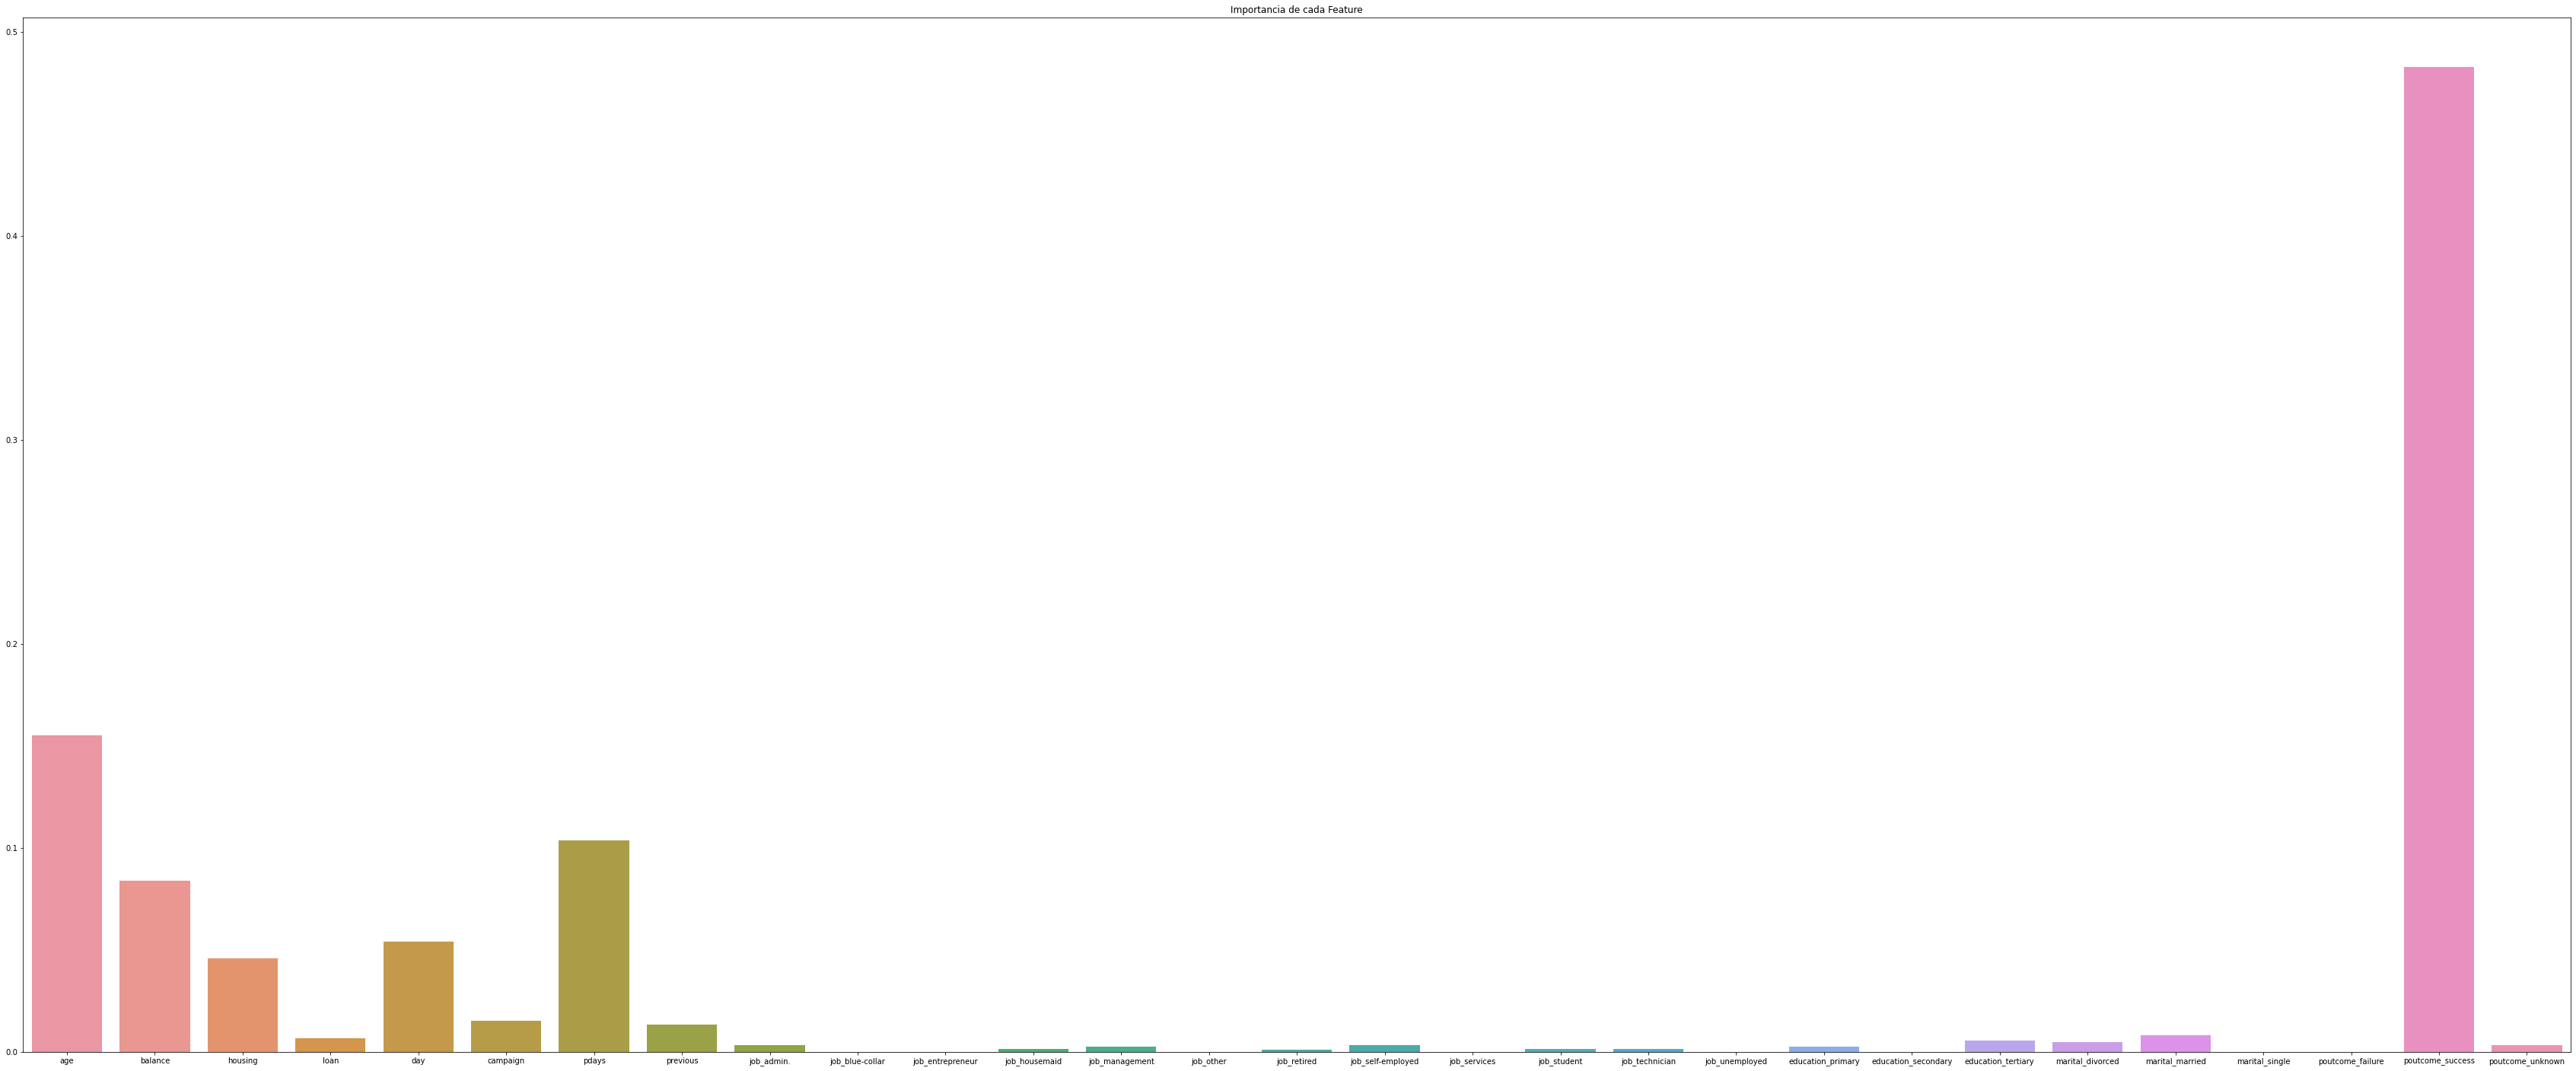

In [21]:
plt.figure(figsize=(60,25))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Observamos que las variables que más importancia inciden en nuestro modelo es la variable que tuvo éxito la campaña pasada y le sigue la edad.

# Regresión Logística

In [28]:
from sklearn.linear_model import LogisticRegression # Importamos el modelo.
regresion_logistica = LogisticRegression()

In [29]:
regresion_logistica.fit(X_train,y_train)

C:\Users\mmelgar\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_train_pred_log = regresion_logistica.predict(X_train) # Predicción en Train.
y_test_pred_log = regresion_logistica.predict(X_test) # Predicción en Test.

In [25]:
# Calculo el cccuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_log)

# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_log)

print('% de aciertos sobre el set de entrenamiento en regresión logística:', train_accuracy)
print('% de aciertos sobre el set de evaluación en regresión logística:',test_accuracy)

% de aciertos sobre el set de entrenamiento en regresión logística: 0.8917377920805932
% de aciertos sobre el set de evaluación en regresión logística: 0.8885170978535869


# Bosque Aleatorio

In [26]:
from sklearn.ensemble import RandomForestClassifier # Importamos el modelo.

In [27]:
# Creamos un Random Forest.
forestmodel = RandomForestClassifier(random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")
forestmodel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=1)

In [28]:
y_train_pred_forest = forestmodel.predict(X_train) # Predicción en Train.
y_test_pred_forest = forestmodel.predict(X_test) # Predicción en Test.

In [29]:
# Calculo el accuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_forest)

# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_forest)

print('% de aciertos sobre el set de entrenamiento en bosque de decisión:', train_accuracy)
print('% de aciertos sobre el set de evaluación en bosque de decisión:',test_accuracy)

% de aciertos sobre el set de entrenamiento en bosque de decisión: 0.9999650202882329
% de aciertos sobre el set de evaluación en bosque de decisión: 0.8930874071655921


C:\Users\mmelgar\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


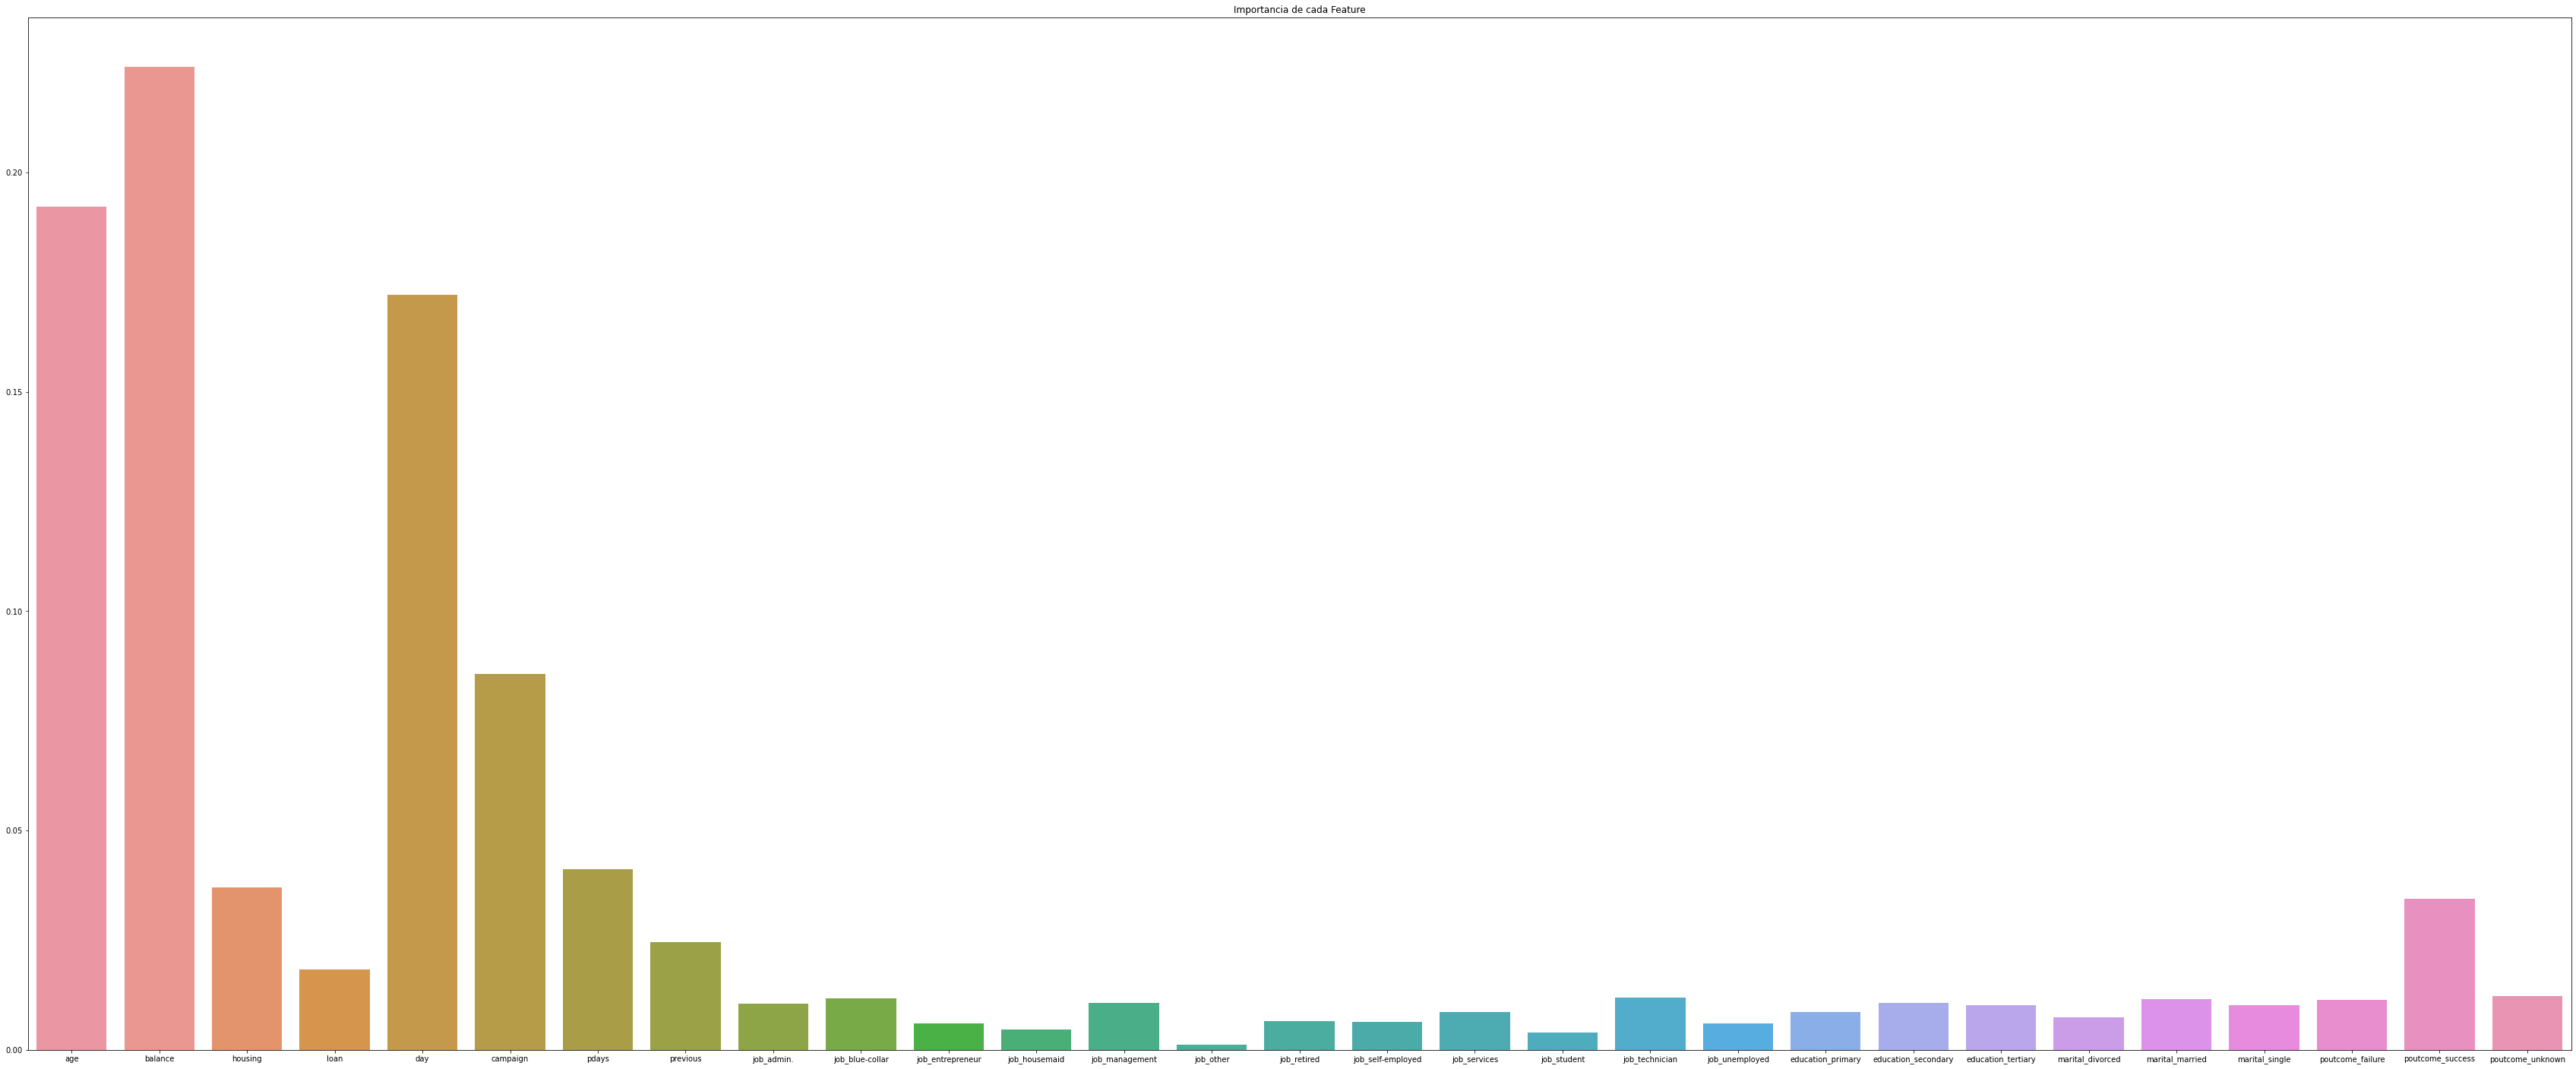

In [30]:
plt.figure(figsize=(60,25))
importances = forestmodel.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Observamos que sigue tomando mucha más importancia el balance seguido de la edad y el día que se hace la llamada.

Concluimos que el modelo con mejor porcentaje de aciertos es el de Árbol de Decisión junto al Bosque Aleatorio con un 89% y por último Regresión Lineal con 88%.

# Evaluación de Modelos

# Árbol de Clasificación

In [18]:
# Creamos la matriz de confusión del modelo de predicción del árbol de clasificación.
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_tree)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[10709   116]
 [ 1155   273]]


Comprobamos el porcentaje de aciertos con la matriz: (10706 + 272) / (10709 + 273 + 119 + 1156) = 0,896

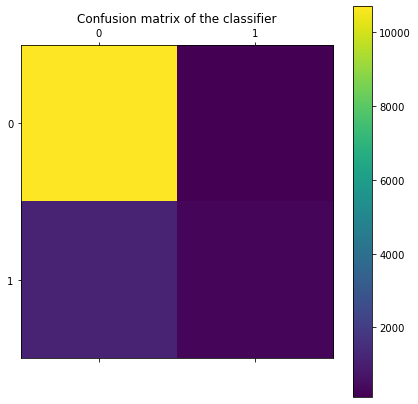

In [32]:
cm = confusion_matrix(y_test, y_test_pred_tree) # La graficamos.
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()

AUC for our classifier is: 0.7053280804238555


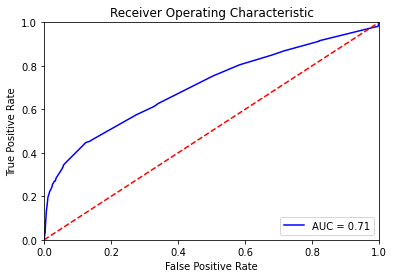

In [57]:
# Creamos la curva ROC del árbol de clasificación.
from sklearn.metrics import roc_curve, auc

class_probabilities = tree.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
from sklearn import metrics # Importamos las métricas para calcular los errores del modelo.
print('Mean Absolute Error tree clasifier:', metrics.mean_absolute_error(y_test, y_test_pred_tree))
print('F1 Score:',f1_score(y_test, y_test_pred_tree))

Mean Absolute Error tree clasifier: 0.1037296988492614
F1 Score: 0.3004953219592735


Observamos que el modelo en cuestión tiene un 70,43% de probabilidad de que pueda distinguir entre los verdaderos  positivos y los falsos negativos y un F1 score del 30%

# Regresión Logística

In [38]:
# Creamos la matriz de confusión del modelo de predicción de la regresión logística.
matriz_regresion = confusion_matrix(y_test, y_test_pred_log)
print('Matriz de Confusión:')
print(matriz_regresion)

Matriz de Confusión:
[[10785    40]
 [ 1326   102]]


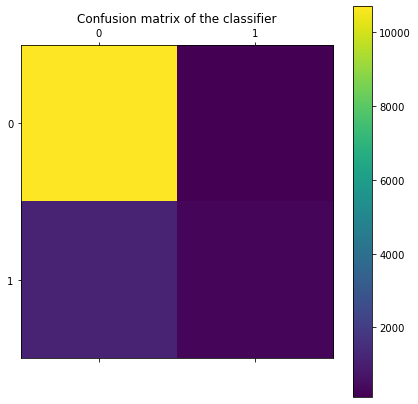

In [39]:
cm_log = confusion_matrix(y_test, y_test_pred_log) # La graficamos.
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()

AUC for our classifier is: 0.717428015085942


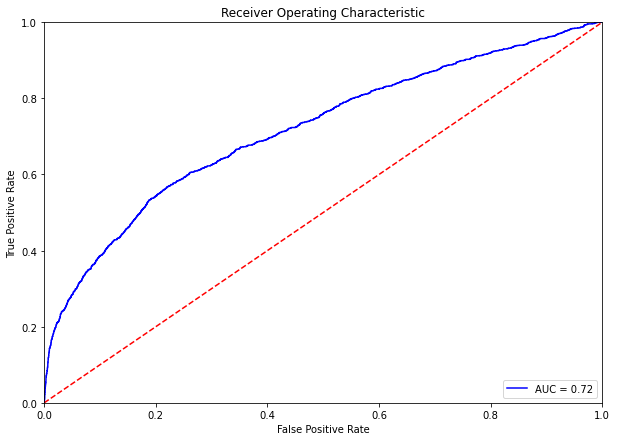

In [40]:
# Creamos la curva ROC de la regresión logística.


class_probabilities = regresion_logistica.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
print('Mean Absolute Error logistic regresion:', metrics.mean_absolute_error(y_test, y_test_pred_log))
print('F1 Score:',f1_score(y_test, y_test_pred_log))

Mean Absolute Error logistic regresion: 0.11148290214641313
F1 Score: 0.12993630573248408


Observamos que el modelo en cuestión tiene un 71,90% de probabilidad de que pueda distinguir entre los verdaderos  positivos y los falsos negativos y un F1 score del 13%

# Bosque Aleatorio

In [43]:
# Creamos la matriz de confusión del modelo de predicción del bosque aleatorio.
matriz_bosque = confusion_matrix(y_test, y_test_pred_forest)
print('Matriz de Confusión:')
print(matriz_regresion)

Matriz de Confusión:
[[10785    40]
 [ 1326   102]]


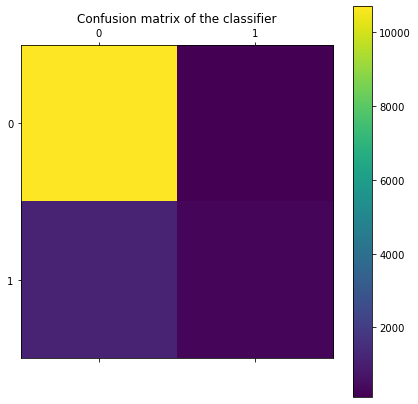

In [46]:
cm_forest = confusion_matrix(y_test, y_test_pred_forest) # La graficamos.
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()

AUC for our classifier is: 0.7151977927429632


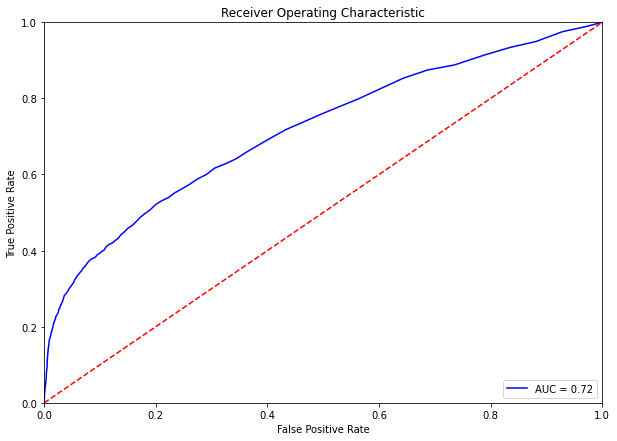

In [45]:
# Creamos la curva ROC del bosque aleatorio.


class_probabilities = forestmodel.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
print('Mean Absolute Error random forest:', metrics.mean_absolute_error(y_test, y_test_pred_forest))
print('F1 Score:',f1_score(y_test, y_test_pred_tree))

Mean Absolute Error random forest: 0.1069125928344079
F1 Score: 0.3004953219592735


Observamos que el modelo en cuestión tiene un 71,80% de probabilidad de que pueda distinguir entre los verdaderos  positivos y los falsos negativos y un F1 score del 30%.

Concluímos que el modelo de mejor predicción de valores correctos e incorrectos con respecto al conjunto de umbrales es el de Bosque Aleatorio, dado que cuenta con un área bajo la curva ROC del 71,80% y un F1 score del 30% siendo así de mayor sensibilidad en relación al resto. Le sigo el modelo de Arbol de Clasificación, con un área bajo la curva ROC de 70,43% y F1 score del 30% y en tercer lugar, el Regresión Logística, con una área bajo la curva ROC de 71,9% y F1 score del 12%.

# Métodos de Ensamble y Boosting

# Bagging

Teniendo en cuenta que el método random forest es un método de bagging, vamos a realizarlo para compararlo

In [11]:
from sklearn.ensemble import BaggingClassifier

In [19]:
bgcl = BaggingClassifier(base_estimator=tree, n_estimators=50)

In [20]:
bgcl = bgcl.fit(X_train, y_train)

In [21]:
y_train_pred_bgcl = bgcl.predict(X_train) # Predicción en Train.
y_test_pred_bgcl = bgcl.predict(X_test) # Predicción en Test.

In [22]:
# Calculo el accuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_bgcl)

# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_bgcl)

print('% de aciertos sobre el set de entrenamiento en Bagging:', train_accuracy)
print('% de aciertos sobre el set de evaluación en Baggin:',test_accuracy)

% de aciertos sobre el set de entrenamiento en Bagging: 0.9083181754582342
% de aciertos sobre el set de evaluación en Baggin: 0.8958622378193095


In [23]:
matriz_bgcl = confusion_matrix(y_test, y_test_pred_bgcl)
print('Matriz de Confusión:')
print(matriz_bgcl)

Matriz de Confusión:
[[10702   123]
 [ 1153   275]]


In [55]:
print('Mean Absolute Bagging:', metrics.mean_absolute_error(y_test, y_test_pred_bgcl))
print('F1 Score:',f1_score(y_test, y_test_pred_bgcl))

Mean Absolute Bagging: 0.10413776218069044
F1 Score: 0.30501089324618735


AUC for our classifier is: 0.7376258078289052


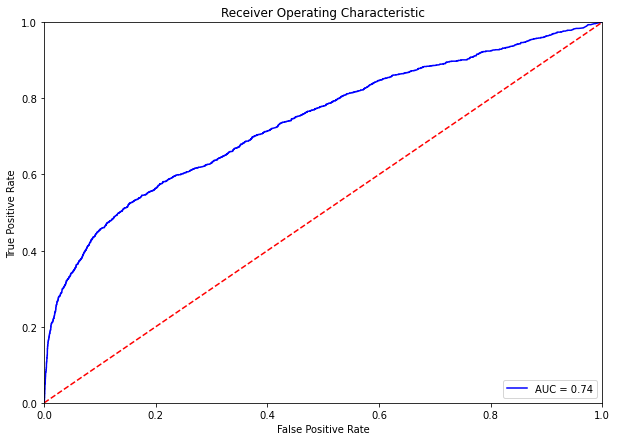

In [54]:
# Creamos la curva ROC de Bagging


class_probabilities = bgcl.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ADABOOST

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
ada = AdaBoostClassifier(base_estimator=regresion_logistica, n_estimators=50,learning_rate=1)

In [33]:
model = ada.fit(X_train, y_train)

C:\Users\mmelgar\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmelgar\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [34]:
y_train_pred_ada = ada.predict(X_train) # Predicción en Train.
y_test_pred_ada = ada.predict(X_test) # Predicción en Test.

In [35]:
# Calculo el accuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_ada)

# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_ada)

print('% de aciertos sobre el set de entrenamiento en Adaboost:', train_accuracy)
print('% de aciertos sobre el set de evaluación en Adaboost:',test_accuracy)

% de aciertos sobre el set de entrenamiento en Adaboost: 0.8877501049391353
% de aciertos sobre el set de evaluación en Adaboost: 0.8836203378764385


In [36]:
matriz_ada = confusion_matrix(y_test, y_test_pred_ada)
print('Matriz de Confusión:')
print(matriz_ada)

Matriz de Confusión:
[[10814    11]
 [ 1415    13]]


In [41]:
print('Mean Absolute Error Adaboost:', metrics.mean_absolute_error(y_test, y_test_pred_ada))
print('F1 Score:',f1_score(y_test, y_test_pred_ada))

Mean Absolute Error Adaboost: 0.11637966212356157
F1 Score: 0.01790633608815427


AUC for our classifier is: 0.7213306939403937


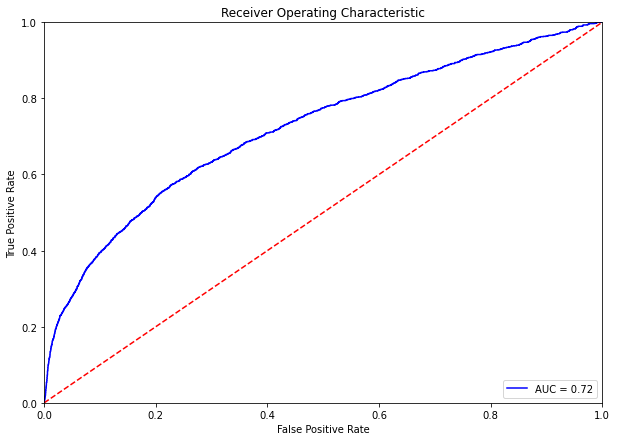

In [63]:
# Creamos la curva ROC de Adaboost.


class_probabilities = ada.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# GradientBoosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 4)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=4)

In [44]:
y_train_pred_gb = gbrt.predict(X_train) # Predicción en Train.
y_test_pred_gb = gbrt.predict(X_test) # Predicción en Test.

In [45]:
matriz_gb = confusion_matrix(y_test, y_test_pred_gb)
print('Matriz de Confusión:')
print(matriz_gb)

Matriz de Confusión:
[[10701   124]
 [ 1142   286]]


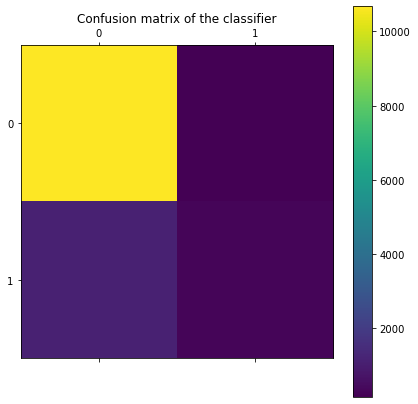

In [268]:
cm_gb = confusion_matrix(y_test, y_test_pred_gb) # La graficamos.
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()

In [46]:
# Calculo el accuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_gb)


# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_gb)

print('% de aciertos sobre el set de entrenamiento en GradientBoosting:', train_accuracy)
print('% de aciertos sobre el set de evaluación en GradientBoosting:',test_accuracy)

% de aciertos sobre el set de entrenamiento en GradientBoosting: 0.9007625577165245
% de aciertos sobre el set de evaluación en GradientBoosting: 0.8966783644821676


In [47]:
print('Mean Absolute Error GradientBoosting:', metrics.mean_absolute_error(y_test, y_test_pred_gb))
print('F1 Score:',f1_score(y_test, y_test_pred_gb))

Mean Absolute Error Adaboost: 0.10332163551783237
F1 Score: 0.3112078346028292


AUC for our classifier is: 0.7518010945717779


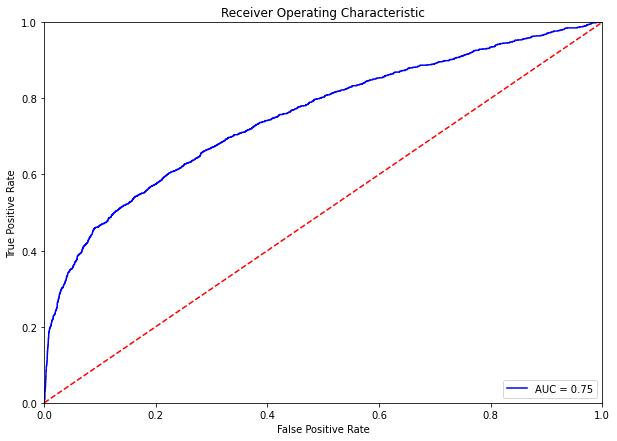

In [264]:
# Creamos la curva ROC de GradientBoosting.

class_probabilities = gbrt.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGB

In [71]:
import xgboost as xgb

In [72]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

In [73]:
clf_xgb.fit(X_train,y_train) # Entrenamos el modelo.

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
y_train_pred_xgb = clf_xgb.predict(X_train) # Predicción en Train.
y_test_pred_xgb = clf_xgb.predict(X_test) # Predicción en Test.

In [75]:
# Creamos la matriz de confusión del modelo de predicción del XGB.
matriz_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print('Matriz de Confusión:')
print(matriz_xgb)

Matriz de Confusión:
[[10709   116]
 [ 1148   280]]


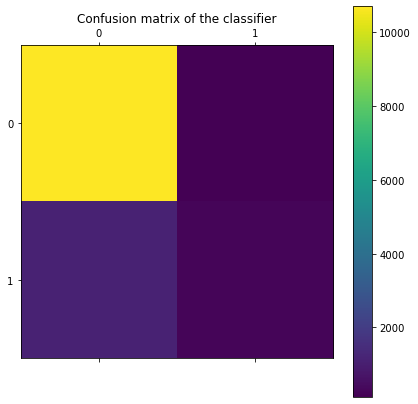

In [76]:
cm = confusion_matrix(y_test, y_test_pred_xgb) # La graficamos.
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()

In [77]:
# Calculo el accuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)

# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)

print('% de aciertos sobre el set de entrenamiento en XGradientBoosting:', train_accuracy)
print('% de aciertos sobre el set de evaluación en XGradientBoosting:',test_accuracy)

% de aciertos sobre el set de entrenamiento en XGradientBoosting: 0.9038057926402686
% de aciertos sobre el set de evaluación en XGradientBoosting: 0.8968415898147393


In [79]:
print('Mean Absolute Error XGradientBoosting:', metrics.mean_absolute_error(y_test, y_test_pred_xgb))
print('F1 Score:',f1_score(y_test, y_test_pred_xgb))

Mean Absolute Error Adaboost: 0.10315841018526076
F1 Score: 0.3070175438596491


# LightGBM 

In [80]:
import lightgbm as lgb

In [81]:
lgb = lgb.LGBMClassifier()

In [82]:
lgb.fit(X_train,y_train) # Entrenamos el modelo.

LGBMClassifier()

In [83]:
y_train_pred_lgb = lgb.predict(X_train) # Predicción en Train.
y_test_pred_lgb = lgb.predict(X_test) # Predicción en Test.

In [84]:
# Creamos la matriz de confusión del modelo de predicción del LightGBM.
matriz_lgb = confusion_matrix(y_test, y_test_pred_lgb)
print('Matriz de Confusión:')
print(matriz_lgb)

Matriz de Confusión:
[[10677   148]
 [ 1132   296]]


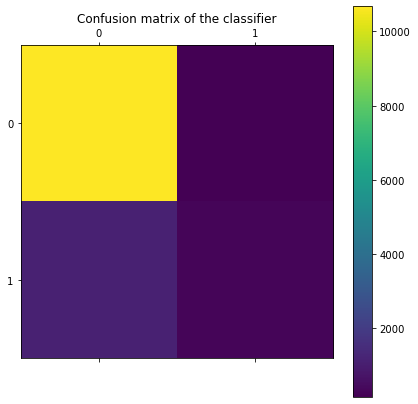

In [85]:
cm = confusion_matrix(y_test, y_test_pred_lgb) # La graficamos.
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()

In [86]:
# Calculo el accuracy en Train.
train_accuracy = accuracy_score(y_train, y_train_pred_lgb)

# Calculo el accuracy en Test.
test_accuracy = accuracy_score(y_test, y_test_pred_lgb)

print('% de aciertos sobre el set de entrenamiento en LightGBM:', train_accuracy)
print('% de aciertos sobre el set de evaluación en LightGBM:',test_accuracy)

% de aciertos sobre el set de entrenamiento en LightGBM: 0.9081782566111655
% de aciertos sobre el set de evaluación en LightGBM: 0.8955357871541664


In [87]:
print('Mean Absolute Error LightGBM:', metrics.mean_absolute_error(y_test, y_test_pred_lgb))
print('F1 Score:',f1_score(y_test, y_test_pred_lgb))

Mean Absolute Error Adaboost: 0.10446421284583367
F1 Score: 0.3162393162393163


Podemos concluir, teniendo en cuenta el % de aciertos sobre los diferentes set de evaluación, todos se mantienen entre 88% y 89% de accuracy. Pero el mejor modelo que se adapta a nuestro problema es el Modelo de GradientBoosting con un % de aciertos del 89%, un ROC de 75% y un F1 score del 31%.

# Hipertuneo de los parámetros del modelo elegido y observación de mejora

In [48]:
parameters = {
    "n_estimators":[5,10,50,75,100,150,250],
    "max_depth":[1,3,5,6,7,8,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [49]:
from sklearn.model_selection import GridSearchCV
gbrt = GradientBoostingClassifier(random_state = 2)
grid_GBR = GridSearchCV(estimator=gbrt, param_grid = parameters, cv = 6, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=GradientBoostingClassifier(random_state=2),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 6, 7, 8, 9],
                         'n_estimators': [5, 10, 50, 75, 100, 150, 250]})

In [52]:
y_train_pred_grid_GBR = grid_GBR.predict(X_train) # Predicción en Train.
y_test_pred_grid_GBR = grid_GBR.predict(X_test) # Predicción en Test.

In [53]:
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=250,
                           random_state=2)

 The best score across ALL searched params:
 0.8974745959626663

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}


In [54]:
print('Mean Absolute Error GradientBoosting:', metrics.mean_absolute_error(y_test, y_test_pred_grid_GBR))
print('F1 Score:',f1_score(y_test, y_test_pred_grid_GBR))

Mean Absolute Error GradientBoosting: 0.10438260017954787
F1 Score: 0.2914127423822715


In [55]:
# Creamos la matriz de confusión del modelo de predicción del GradientBoosting tuneado.
matriz_GBR = confusion_matrix(y_test, y_test_pred_grid_GBR)
print('Matriz de Confusión:')
print(matriz_GBR)

Matriz de Confusión:
[[10711   114]
 [ 1165   263]]


AUC for our classifier is: 0.743340546380215


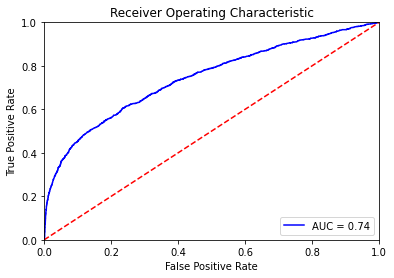

In [58]:
# Creamos la curva ROC de GradientBoosting tuneado.

class_probabilities = grid_GBR.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Podemos concluir que nos quedamos con el método de GradientBoosting sin tunear los parámetros.
El hipertuneo nos arroja un accuracy del 0,897, F1 score = 0,29, la media del error absoluto = 0,10 y la curva ROC 0,74.
El modelo sin hipertunear, nos da un accuracy del 0,896, F1 Score = 0,31, la media del error absoluto = 0,10 y la curva ROC 0,75.
Como se ve, el accuracy solo aumenta un 0,001 con respecto al otro modelo, pero baja el F1 score y la curva ROC, a su vez, el rendimiento computacional realizando GridSearch CV es mucho para variar poco el valor del accuracy, es por eso que el modelo elegido es el GradientBoosting sin hipertunear los parámetros, es decir, con los parámetros en Default.